In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202106          7  13642     9914   17370      21          15   
1     202105          7  12210     8988   15432      18          13   
2     202104          7  12026     8826   15226      18          13   
3     202103          7   8913     6375   11451      13           9   
4     202102          7   7795     5430   10160      12           8   
5     202101          7  10525     7750   13300      16          12   
6     202053          7  11978     8406   15550      18          13   
7     202052          7  12012     8285   15739      18          12   
8     202051          7  10564     7574   13554      16          11   
9     202050          7   7063     4744    9382      11           7   
10    202049          7   5026     3145    6907       8           5   
11    202048          7   6683     4312    9054      10           6   
12    202047          7   4999     2963    7035       8           5   
13    202046          7   3752     1963    5541       6           3   
14    202045          7   3696     2016    5376       6           3   
15    202044          7   4391     2375    6407       7           4   
16    202043          7   4376     2505    6247       7           4   
17    202042          7   4000     1979    6021       6           3   
18    202041          7   3961     2099    5823       6           3   
19    202040          7   2078      675    3481       3           1   
20    202039          7   1049      237    1861       2           1   
21    202038          7   2253      782    3724       3           1   
22    202037          7   1584      405    2763       2           0   
23    202036          7    919      100    1738       1           0   
24    202035          7    828        0    1694       1           0   
25    202034          7   2272      371    4173       3           0   
26    202033          7   1284      177    2391       2           0   
27    202032          7   2650      689    4611       4           1   
28    202031          7   1303      100    2506       2           0   
29    202030          7   1385       75    2695       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1546  199126          7  17608    11304   23912      31          20   
1547  199125          7  16169    10700   21638      28          18   
1548  199124          7  16171    10071   22271      28          17   
1549  199123          7  11947     7671   16223      21          13   
1550  199122          7  15452     9953   20951      27          17   
1551  199121          7  14903     8975   20831      26          16   
1552  199120          7  19053    12742   25364      34          23   
1553  199119          7  16739    11246   22232      29          19   
1554  199118          7  21385    13882   28888      38          25   
1555  199117          7  13462     8877   18047      24          16   
1556  199116          7  14857    10068   19646      26          18   
1557  199115          7  13975     9781   18169      25          18   
1558  199114          7  12265     7684   16846      22          14   
1559  199113          7   9567     6041   13093      17          11   
1560  199112          7  10864     7331   14397      19          13   
1561  199111          7  15574    11184   19964      27          19   
1562  199110          7  16643    11372   21914      29          20   
1563  199109          7  13741     8780   18702      24          15   
1564  199108          7  13289     8813   17765      23          15   
1565  199107          7  12337     8077   16597      22          15   
1566  199106          7  10877     7013   14741      19          12   
1567  199105          7  10442     6544   14340      18          11   
1568  199104          7   7913     4563   11263      14           8   
1569  199103          7  15387    10484   20290      27          18   
1570  199102          7  16277  

In [4]:
raw_data.describe()

week  indicator           inc       inc_low        inc_up  \
count    1576.000000     1576.0   1576.000000   1576.000000   1576.000000   
mean   200578.858503        7.0  12567.890863   7918.398477  17254.604061   
std       872.112355        0.0   6659.393511   5180.047063   8424.456030   
min    199049.000000        7.0    161.000000      0.000000    597.000000   
25%    199825.750000        7.0   7228.500000   3541.750000  10709.500000   
50%    200601.500000        7.0  12526.500000   7826.500000  17241.500000   
75%    201330.250000        7.0  17142.250000  11622.000000  22757.500000   
max    202106.000000        7.0  36298.000000  25490.000000  54240.000000   

            inc100   inc100_low    inc100_up  
count  1576.000000  1576.000000  1576.000000  
mean     20.661802    13.018401    28.367386  
std      11.033650     8.576619    13.974450  
min       0.000000     0.000000     1.000000  
25%      12.000000     6.000000    17.000000  
50%      21.000000    13.000000    29.000000  
75%      28.000000    19.000000    38.000000  
max      61.000000    44.000000    90.000000

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [6]:
data = raw_data.copy()

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [8]:
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202106          7  13642     9914   17370      21          15   
1     202105          7  12210     8988   15432      18          13   
2     202104          7  12026     8826   15226      18          13   
3     202103          7   8913     6375   11451      13           9   
4     202102          7   7795     5430   10160      12           8   
5     202101          7  10525     7750   13300      16          12   
6     202053          7  11978     8406   15550      18          13   
7     202052          7  12012     8285   15739      18          12   
8     202051          7  10564     7574   13554      16          11   
9     202050          7   7063     4744    9382      11           7   
10    202049          7   5026     3145    6907       8           5   
11    202048          7   6683     4312    9054      10           6   
12    202047          7   4999     2963    7035       8           5   
13    202046          7   3752     1963    5541       6           3   
14    202045          7   3696     2016    5376       6           3   
15    202044          7   4391     2375    6407       7           4   
16    202043          7   4376     2505    6247       7           4   
17    202042          7   4000     1979    6021       6           3   
18    202041          7   3961     2099    5823       6           3   
19    202040          7   2078      675    3481       3           1   
20    202039          7   1049      237    1861       2           1   
21    202038          7   2253      782    3724       3           1   
22    202037          7   1584      405    2763       2           0   
23    202036          7    919      100    1738       1           0   
24    202035          7    828        0    1694       1           0   
25    202034          7   2272      371    4173       3           0   
26    202033          7   1284      177    2391       2           0   
27    202032          7   2650      689    4611       4           1   
28    202031          7   1303      100    2506       2           0   
29    202030          7   1385       75    2695       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1546  199126          7  17608    11304   23912      31          20   
1547  199125          7  16169    10700   21638      28          18   
1548  199124          7  16171    10071   22271      28          17   
1549  199123          7  11947     7671   16223      21          13   
1550  199122          7  15452     9953   20951      27          17   
1551  199121          7  14903     8975   20831      26          16   
1552  199120          7  19053    12742   25364      34          23   
1553  199119          7  16739    11246   22232      29          19   
1554  199118          7  21385    13882   28888      38          25   
1555  199117          7  13462     8877   18047      24          16   
1556  199116          7  14857    10068   19646      26          18   
1557  199115          7  13975     9781   18169      25          18   
1558  199114          7  12265     7684   16846      22          14   
1559  199113          7   9567     6041   13093      17          11   
1560  199112          7  10864     7331   14397      19          13   
1561  199111          7  15574    11184   19964      27          19   
1562  199110          7  16643    11372   21914      29          20   
1563  199109          7  13741     8780   18702      24          15   
1564  199108          7  13289     8813   17765      23          15   
1565  199107          7  12337     8077   16597      22          15   
1566  199106          7  10877     7013   14741      19          12   
1567  199105          7  10442     6544   14340      18          11   
1568  199104          7   7913     4563   11263      14           8   
1569  199103          7  15387    10484   20290      27          18   
1570  199102          7  16277  

In [9]:
sorted_data = data.set_index('period').sort_index()

In [10]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2020-07-20/2020-07-26  202030          7   1385       75    2695       2   
2020-07-27/2020-08-02  202031          7   1303      100    2506       2   
2020-08-03/2020-08-09  202032          7   2650      689    4611       4   
2020-08-10/2020-08-16  202033          7   1284      177    2391       2   
2020-08-17/2020-08-23  202034          7   2272      371    4173       3   
2020-08-24/2020-08-30  202035          7    828        0    1694       1   
2020-08-31/2020-09-06  202036          7    919      100    1738       1   
2020-09-07/2020-09-13  202037          7   1584      405    2763       2   
2020-09-14/2020-09-20  202038          7   2253      782    3724       3   
2020-09-21/2020-09-27  202039          7   1049      237    1861       2   
2020-09-28/2020-10-04  202040          7   2078      675    3481       3   
2020-10-05/2020-10-11  202041          7   3961     2099    5823       6   
2020-10-12/2020-10-18  202042          7   4000     1979    6021       6   
2020-10-19/2020-10-25  202043          7   4376     2505    6247       7   
2020-10-26/2020-11-01  202044          7   4391     2375    6407       7   
2020-11-02/2020-11-08  202045          7   3696     2016    5376       6   
2020-11-09/2020-11-15  202046          7   3752     1963    5541       6   
2020-11-16/2020-11-22  202047          7   4999     2963    7035       8   
2020-11-23/2020-11-29  202048          7   6683     4312    9054      10   
2020-11-30/2020-12-06  202049          7   5026     3145    6907       8 

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

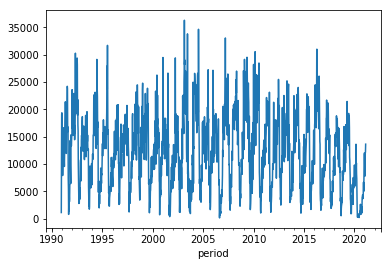

In [12]:
sorted_data['inc'].plot()

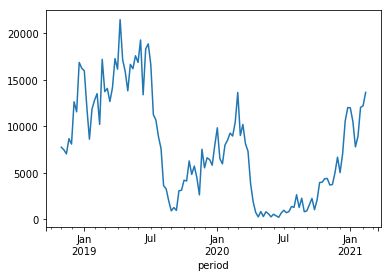

In [13]:
sorted_data['inc'][-120:].plot()

In [14]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [15]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

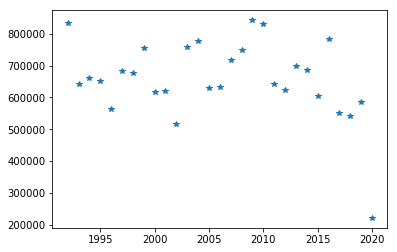

In [16]:
yearly_incidence.plot(style='*')

In [17]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64